In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/vys-leon/House-Prices-Prediction.git

fatal: destination path 'House-Prices-Prediction' already exists and is not an empty directory.


In [3]:
data = pd.read_csv("./House-Prices-Prediction/data/raw/train.csv")

In [4]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Общая информация о датасете

In [5]:
data.shape

(1460, 81)

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.dtypes.value_counts()

,count
object,43
int64,35
float64,3


In [8]:
for col in data.columns:
    print(data[col].value_counts())

Id
1460    1
1       1
2       1
3       1
1444    1
       ..
9       1
8       1
7       1
6       1
5       1
Name: count, Length: 1460, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64
LotArea
7200     25
9600     24
6000     17
10800    14
8400     14
         ..
10652     1
12968     1
11924     1
14260     1
9550      1
Name: count, Length: 1073, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
I

In [9]:
isna_stat = data.isna().sum()
isna_stat = isna_stat.loc[isna_stat != 0]
isna_stat

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [10]:
isna_stat / len(data)

,0
LotFrontage,0.177397
Alley,0.937671
MasVnrType,0.597260
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685


Вывод:  
1) В train части датасета 1460 строк и 81 столбец  
2) Среди признаков 43 категориальных (с типом object) и 38 числовых (с типами int64 и float64)
3) В некоторых столбцах есть пропуски. Какие-то столбцы нужно будет полностью выкинуть (т.к. практически весь столбец пустой). Остальные же заполнить средним (для численных признаков) или модой (для категориальных)

## Анализ целевой переменной (SalePrice)

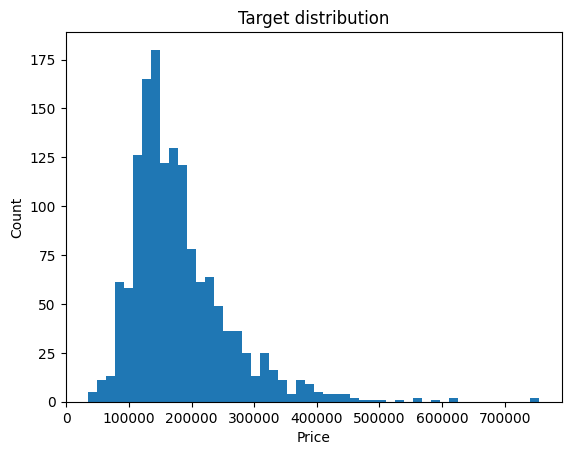

In [11]:
plt.hist(data['SalePrice'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Target distribution')
plt.show()

Видно, что распределение цен на дома асимметрично и соответсвенно сильно отличается от нормального. Попробуем сделать log-преобразование для цен (таргета в задаче) и посмотрим на получившееся распределение

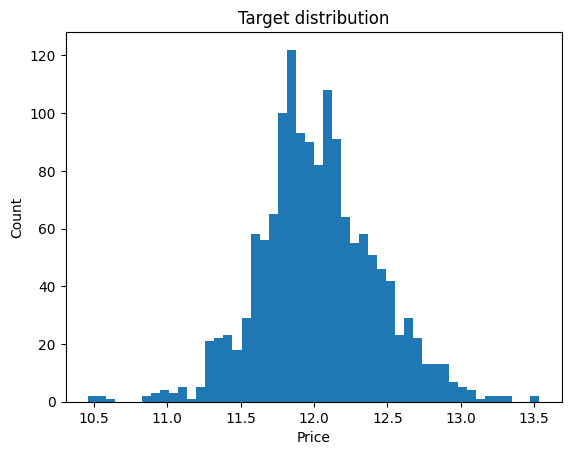

In [12]:
plt.hist(np.log(data['SalePrice']), bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Target distribution')
plt.show()

Теперь распределение больше напоминает нормальное распределение. Поэтому перед тем, как подать данные в модель, нужно будет преобразовать таргет

Посмотрим на возможные выбросы таргета. Для этого построим boxplot для него

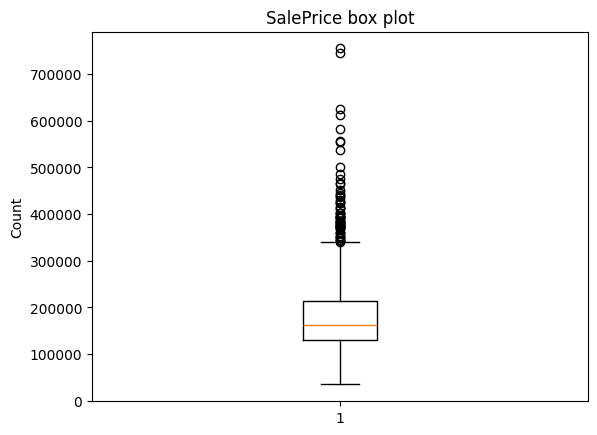

In [13]:
plt.boxplot(data['SalePrice'])
plt.title('SalePrice box plot')
plt.ylabel('Count')
plt.show()

Выбросы есть и их довольно много. Но теперь попробуем применить лог преобразование к таргету

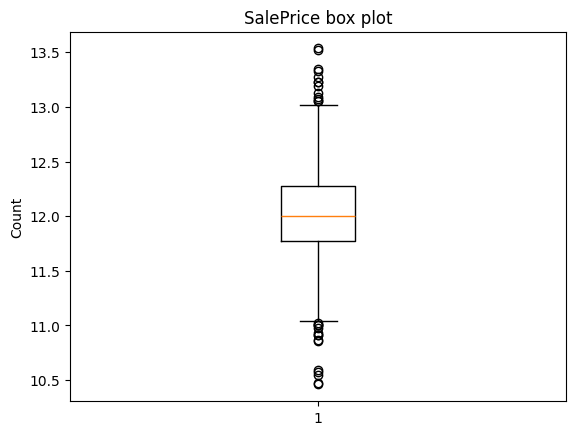

In [14]:
plt.boxplot(np.log(data['SalePrice']))
plt.title('SalePrice box plot')
plt.ylabel('Count')
plt.show()

Теперь выбросы стали ближе к среднему по выборке, а также симметричны относительно него. Поэтому они будут меньше мешать работе модели и можно оставить просто лог-преобразование таргета

## Разделение признаков на категориальные и числовые

In [15]:
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(include=['number']).columns.tolist()

In [16]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [18]:
num_cols.remove('SalePrice')
num_cols.remove('Id')
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [19]:
print("Num of features: ", len(data.columns))
print("Num of categorical features: ", len(cat_cols))
print("Num of numerical features: ", len(num_cols))

Num of features:  81
Num of categorical features:  43
Num of numerical features:  36


## Обработка пропусков

In [20]:
isna_stat

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Удалим признаки, у которых число пропусков близко к длине датасета 1460 (как неинформативные). Таких признаков три: Alley, PoolQC, MiscFeature.  
Для остальных признаков заполним пропуски средним/модой

In [21]:
cat_cols.remove('Alley')
cat_cols.remove('PoolQC')
cat_cols.remove('MiscFeature')

In [22]:
isna_stat.drop(['Alley', 'PoolQC', 'MiscFeature'], inplace=True)

In [23]:
data.drop(columns=['Alley', 'PoolQC', 'MiscFeature'], inplace=True)

In [24]:
for col in isna_stat.index:
    if col in cat_cols:
        print(col, data[col].isna().sum())
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        print("\t", col, data[col].isna().sum())
        data[col] = data[col].fillna(data[col].mean())

	 LotFrontage 259
MasVnrType 872
	 MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
	 GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
Fence 1179


In [25]:
data.isna().sum().loc[data.isna().sum() != 0]

,0


В итоге получаем, что теперь пропусков в train датасете нет

## Корреляция признаков с таргетом

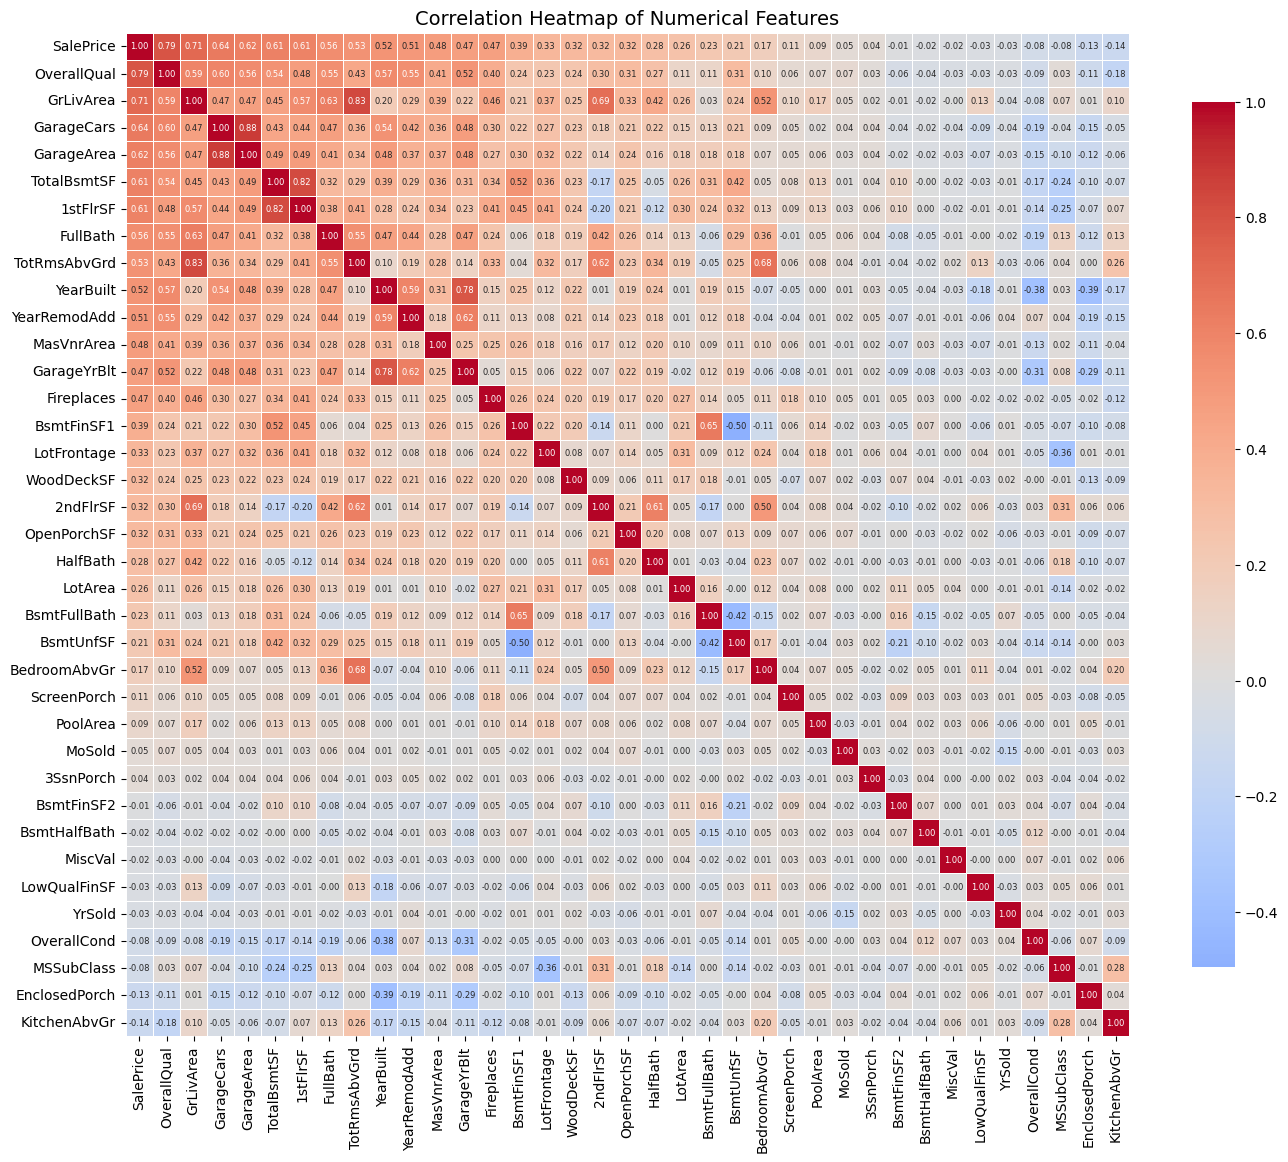

In [44]:
target = 'SalePrice'
num_df = data[num_cols + [target]]
corr_matrix = num_df.corr()

# Отсортируем признаки по корреляции с таргетом
corr_with_target = corr_matrix[target].sort_values(ascending=False)
sorted_cols = corr_with_target.index
corr_matrix = corr_matrix.loc[sorted_cols, sorted_cols]

# Рисуем тепловую карту
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6}

)

plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

Пока что я буду рассматривать корреляцию числовых признаков с таргетом.  
Из тепловой карты получаем, что наиболее коррелирующими с таргетом являются признаки (по убыванию значения корреляции): OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF.  
И этот результат довольно логичен: чем больше качество и площадь дома, чем больше места под машины - тем больше должна быть цена дома.

## Вывод

На данном этапе разведочный анализ данных был намеренно сделан минимальным.
Основной целью было понять распределение целевой переменной, обработать пропущенные значения и выявить потенциальные проблемы в данных перед построением базовых моделей.
Дальнейший анализ признаков и их отбор будут выполняться итеративно на основе качества моделей и анализа ошибок.